In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['melanoma_2391.jpg', 'melanoma_2397.jpg', 'melanoma_2406.jpg', 'melanoma_2411.jpg', 'melanoma_2402.jpg', 'melanoma_2384.jpg', 'melanoma_2385.jpg', 'melanoma_2412.jpg', 'melanoma_2410.jpg', 'melanoma_240.jpg']
['melanoma_6473.jpg', 'melanoma_6477.jpg', 'melanoma_6467.jpg', 'melanoma_6481.jpg', 'melanoma_6470.jpg', 'melanoma_6465.jpg', 'melanoma_6486.jpg', 'melanoma_6476.jpg', 'melanoma_6478.jpg', 'melanoma_6513.jpg']
['melanoma_10005.jpg', 'melanoma_10000.jpg', 'melanoma_10002.jpg', 'melanoma_10004.jpg', 'melanoma_10006.jpg', 'melanoma_10003.jpg', 'melanoma_10001.jpg', 'melanoma_10047.jpg', 'melanoma_10042.jpg', 'melanoma_10020.jpg']
['melanoma_10110.jpg', 'melanoma_10106.jpg', 'melanoma_10107.jpg', 'melanoma_10108.jpg', 'melanoma_10105.jpg', 'melanoma_10109.jpg', 'melanoma_10122.jpg', 'melanoma_10125.jpg', 'melanoma_10137.jpg', 'melanoma_10121.jpg']
total training benign images: 2549
total training malignant images: 2432
total test benign images: 500
total test malignant images: 500


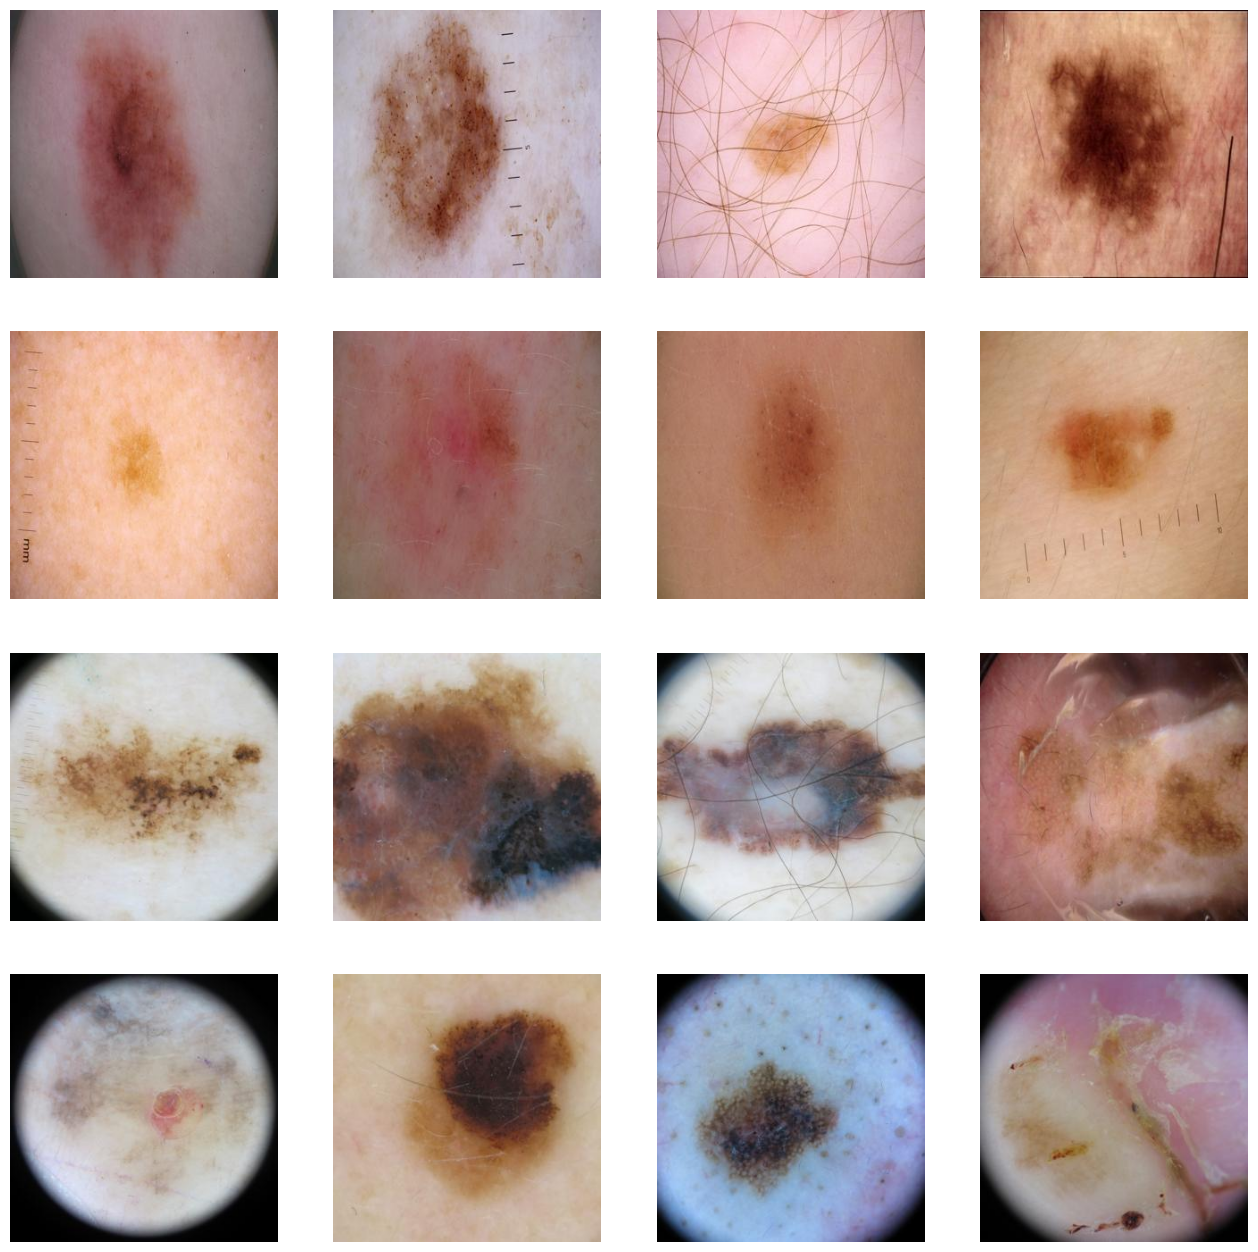

Found 4981 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import os
import zipfile


# The contents of the .zip are extracted to the base directory /dataset,
# which in turn each contain benign and malignant subdirectories.
# Let's now define the 4 directories

train_benign_dir = os.path.join('/content/drive/MyDrive/ssmelanoma_cancer_dataset/train/benign')

train_malignant_dir = os.path.join('/content/drive/MyDrive/ssmelanoma_cancer_dataset/train/malignant')

test_benign_dir = os.path.join('/content/drive/MyDrive/ssmelanoma_cancer_dataset/test/benign')

test_malignant_dir = os.path.join('/content/drive/MyDrive/ssmelanoma_cancer_dataset/test/malignant')

#Let's view the file (image) labels of our dataset

train_benign_names = os.listdir(train_benign_dir)
print(train_benign_names[:10])

train_malignant_names = os.listdir(train_malignant_dir)
print(train_malignant_names[:10])

test_benign_names = os.listdir(test_benign_dir)
print(test_benign_names[:10])

test_malignant_names = os.listdir(test_malignant_dir)
print(test_malignant_names[:10])

# Now we can View the number of benign and malignant images in the dataset

print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))
print('total test benign images:', len(os.listdir(test_benign_dir)))
print('total test malignant images:', len(os.listdir(test_malignant_dir)))

# Let's now view sample of pictures from our dataset!

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Now, we will display a batch of 8 benign and 8 malignant pictures:
# Setting up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_benign_pix = [os.path.join(train_benign_dir, fname)
                for fname in train_benign_names[pic_index-8:pic_index]]
next_malignant_pix = [os.path.join(train_malignant_dir, fname)
                for fname in train_malignant_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Preprocessing the training set and applying data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range =0.2 , ### Choose a shear_range
                                   zoom_range = 0.2, ### Choose a zoom range
                                   horizontal_flip = True) ### Assign the Horizontal flip
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ssmelanoma_cancer_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size =32 , ### Choose the batch size
                                                 class_mode = 'binary')

In [7]:
# Preprocessing the test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ssmelanoma_cancer_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [8]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Note the input shape is the desired size of the image 64*64 with 3 bytes color
# Create the first Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Create a Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Create the second Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


# Add another Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten the results to feed into the CNN
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Convolutional Neural Network with 128 neuron hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation= 'relu'  )) ### Choose Activation Function

# Creating the Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation= 'sigmoid'  )) ### Choose Activation Function

cnn.summary()

# We will train our model with the binary_crossentropy loss,
# because it's a binary classification problem and our final activation is a sigmoid.
# We will use the adam optimizer.
# During training, we will want to monitor classification accuracy.
cnn.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy']) ### Choose Optimizer

#Training our CNN on the training set and evaluating it on the test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

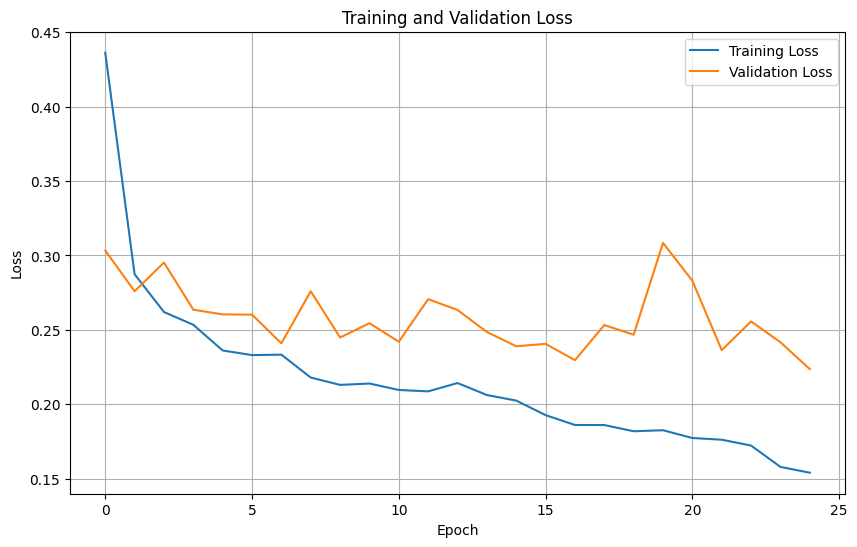

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

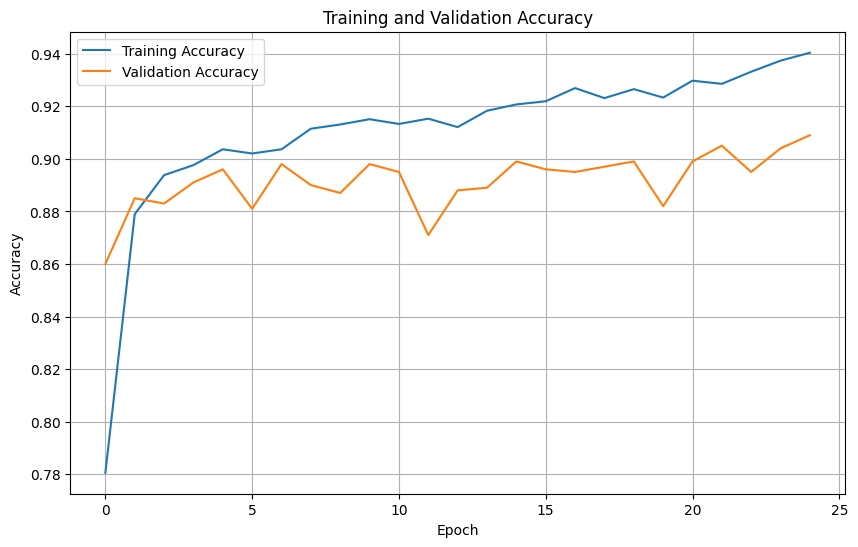

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import os
print(os.getcwd())


/content


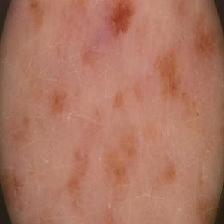

In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/content/drive/MyDrive/skin_lesion/melanoma_30.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [14]:
# Testing the CNN on your own Image!
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/skin_lesion/melanoma_30.jpg', target_size = (64, 64)) ### TRY Your Own Image!
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'benign'
else:
  prediction ='malignant'

print(prediction)
print(result)

1/1 [==============================] - 0s 136ms/step
malignant
[[0.]]


In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_set)

# Print the accuracy and loss
print("Accuracy:", test_accuracy)
print("Loss:", test_loss)


32/32 [==============================] - 3s 96ms/step - loss: 0.2236 - accuracy: 0.9090
Accuracy: 0.9089999794960022
Loss: 0.22359882295131683
